**Description**

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

* **CustomerId:** Unique ID which is assigned to each customer

* **Surname:** Last name of the customer

* **CreditScore:** It defines the credit history of the customer.

* **Geography:** A customer’s location.

* **Gender:** It defines the Gender of the customer

* **Age:** Age of the customer.

* **Tenure:** Number of years for which the customer has been with the bank.

* **NumOfProducts:** It refers to the number of products that a customer has purchased through the bank.

* **Balance:** Account balance.

* **HasCrCard:** It is a categorical variable that decides whether the customer has a credit card or not.

* **EstimatedSalary:** Estimated salary.

* **isActiveMember:** It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

* **Exited:** It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values

  * 0=No ( Customer did not leave the bank )
  * 1=Yes ( Customer left the bank )

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)


## Basic Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Course/Artificial Intelligence/Project/Churn.csv')

In [ ]:
data1 = data.copy()

In [ ]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    10000
dtype: int64

In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe(exclude=None).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
cate_cols = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']

In [ ]:
for cat in cate_cols:
  print("The value count for the column:",cat)
  print(data[cat].value_counts())
  print("*"*50)

The value count for the column: Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
The value count for the column: Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
The value count for the column: NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
**************************************************
The value count for the column: HasCrCard
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************
The value count for the column: IsActiveMember
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************
The value count for the column: Exited
0    7963
1    2037
Name: Exited, dtype: int64
**************************************************


In [ ]:
data['Surname']

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

From the basic Data Analysis:
* There are no missing values and duplicate values
* The dataset has 10000 rows and 14 columns
* The variables - **RowNumber** and **Surname** can be removed as they dont provide any meaningful information for our analysis and we already have **CustomerId** as a unique identifier for each row
* So, after the removal of columns  **RowNumber** and **Surname**:
  * **'CustomerId'**
  * **'CreditScore'** - has a mean of around 650
  * **'Geography'** - has a total of 3 geographic locations (France, Germany and Spain) with most customers from France.
  * **'Gender'** - most customers are Male
  * **'Age'** - has a mean of around 39
  * **'Tenure'** - The customers have been atleast 5 years with the bank.   
  * **'Balance'** - The mean balance is around 76000 and the 50th percentile is around 97000 indicating the data in the dataset contains customers with a good balance.  
  * **'NumOfProducts'** - It looks like there are 4 different products and atleast 50% of the customers are using 1 product.
  * **'HasCrCard'** - about 70% of the customers have a credit card.
  * **'IsActiveMember'** - only about 50% of the customers are active members of the bank
  * **'EstimatedSalary'** - the mean and the 50th percentile is around 100000 which is in accordance with the Balance.
  * **'Exited'** - the target varaible is not balanced - about 80% is of one class and only 20% is of the other class. we can try some balancing techniques if the end model performs poor.  
* **'Exited'** is our target variable

The following variables are of integer type that need to be categorical - later we can use it for one hot encoding:
* **Geography**
* **Gender**
* **HasCrCard**
* **IsActiveMember**
* **Exited**

## Data Cleaning

In [ ]:
cat_cols = ['Geography','Gender','HasCrCard','IsActiveMember','Exited']

In [ ]:
for col in cat_cols:
  data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.7+ KB


In [ ]:
data = data.drop('RowNumber',axis=1)

In [ ]:
data = data.drop('Surname',axis=1)

In [ ]:
data.sample(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9203,15774401,773,Spain,Male,51,4,0.00,2,0,0,123587.83,1
7827,15735968,605,France,Male,41,10,0.00,2,0,1,97213.09,0
3620,15763806,773,France,Male,41,4,0.00,2,1,1,24924.92,0
5919,15815043,645,Spain,Male,49,8,0.00,2,1,0,162012.60,0
72,15812518,657,Spain,Female,37,0,163607.18,1,0,1,44203.55,0


## **Exploratory Data Analysis and Outliers Treatment**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

### Uni-Variate Analysis

In [ ]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

### Credit Score

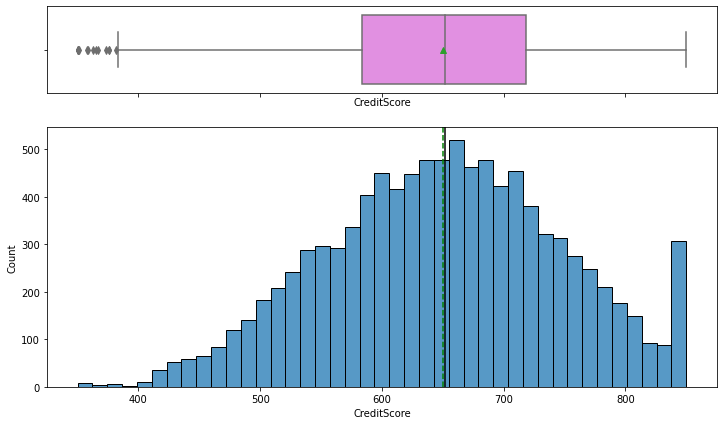

In [ ]:
histogram_boxplot(data,"CreditScore")

There seems to be some outliers that are on the left side of the distribution. However, these values can be valid too. Let us examine these values further.  

In [ ]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [ ]:
Q1 = data["CreditScore"].quantile(0.25)  # 25th quantile
Q3 = data["CreditScore"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker_creditscore = Q1 - 1.5 * IQR
Upper_Whisker_creditscore = Q3 + 1.5 * IQR
data_lower_creditscore = data[data['CreditScore']<= Lower_Whisker_creditscore]

In [ ]:
data_lower_creditscore

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,15804586,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,15779947,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
5494,15642821,383,Spain,Female,48,8,95808.19,1,0,0,137702.01,1


Looking at the customers with lower CreditScore:
* Most of these customers have 0 balance. This could be actually be true or this could be from the fact that "Customer was interested in sharing the bank balance". The later is likely to be true from the "EstimatedSalary" variable.
* **Surprisingly, all these outlier customers for CreditScore have exited the bank/churned.**
* We also do not have enough evidence to prove why the credit score is low for these customers as creditscore depend upon so any factors like credit history, no of credit cards, etc and we do not have such variables in our dataset for out analysis.
* As we do not have more justifications and since these customers data look legit, let us not treat these outliers.

### Geography

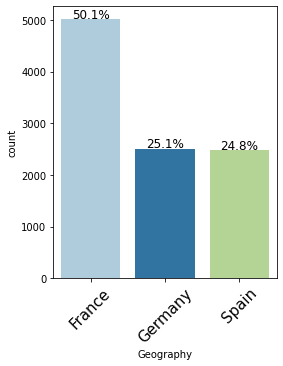

In [ ]:
labeled_barplot(data, "Geography", perc=True)

50% of the customers are from France.

### Gender

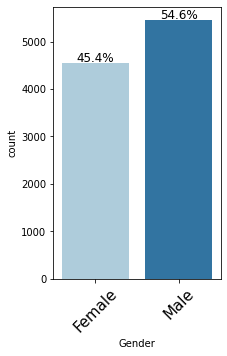

In [ ]:
labeled_barplot(data, "Gender", perc=True)

There are more Male customers than Female

### Age

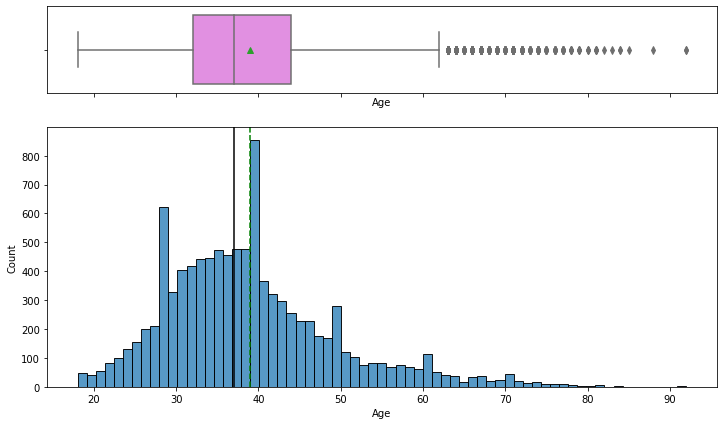

In [ ]:
histogram_boxplot(data,"Age")

The variable - **Age** has some outliers on the right side of the distribution. ALthough, it is very common to have outliers for age, let us further examine these values.

In [ ]:
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
Q1 = data["Age"].quantile(0.25)  # 25th quantile
Q3 = data["Age"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker_Age = Q1 - 1.5 * IQR
Upper_Whisker_Age = Q3 + 1.5 * IQR
data_higher_age = data[data['Age']>= Upper_Whisker_Age]

In [ ]:
data_higher_age

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,15804919,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,15589975,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,15789669,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9765,15777067,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,15814690,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9879,15669414,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9894,15704795,521,France,Female,77,6,0.00,2,1,1,49054.10,0


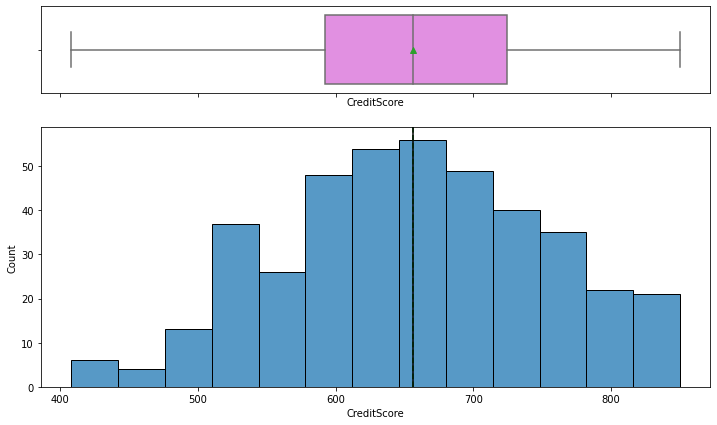

In [ ]:
histogram_boxplot(data_higher_age,"CreditScore")

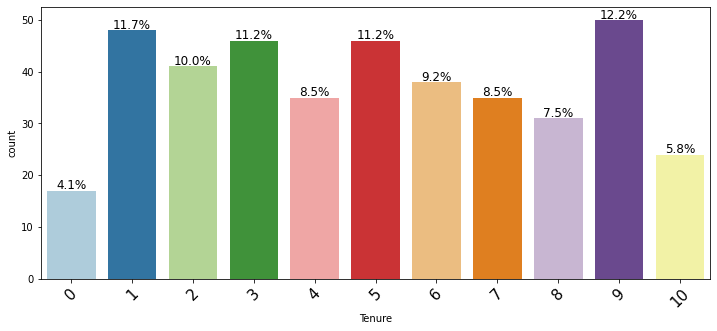

In [ ]:
labeled_barplot(data_higher_age, "Tenure", perc=True)

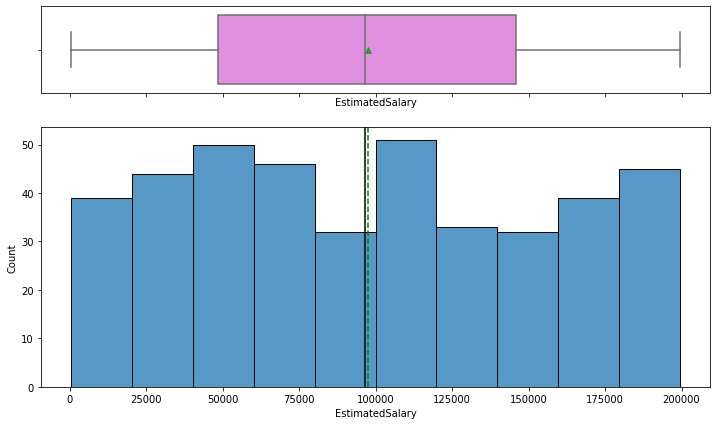

In [ ]:
histogram_boxplot(data_higher_age,"EstimatedSalary")

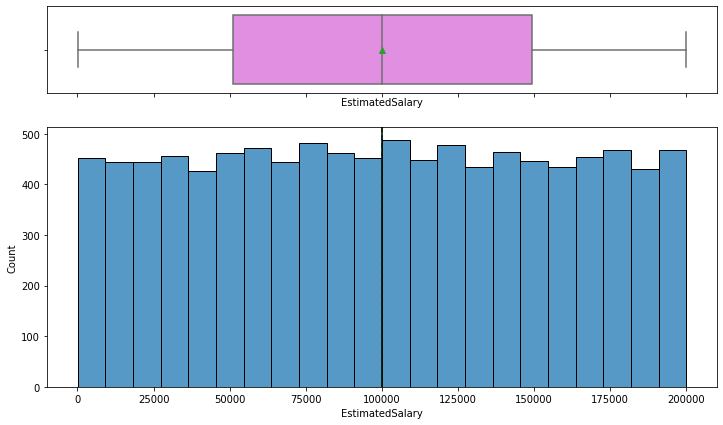

In [ ]:
histogram_boxplot(data,"EstimatedSalary")

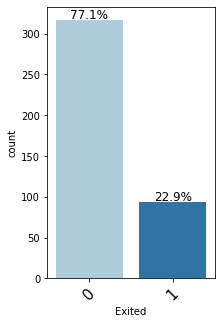

In [ ]:
labeled_barplot(data_higher_age, "Exited", perc=True)

* There are 411 datapoints with Age higher than the Upper whisker value.
* Although, there aren't sufficient variables to provide justifications to these outliers, taking a look at the Salary, Tenure, CreditScore gives us a good indication that these outliers are valid assuming that the Salary, Tenure and CreditScore all would go up with age.
* The distribution of these customers to have churned is similar to the ditribution to the whole dataset.  

### Tenure

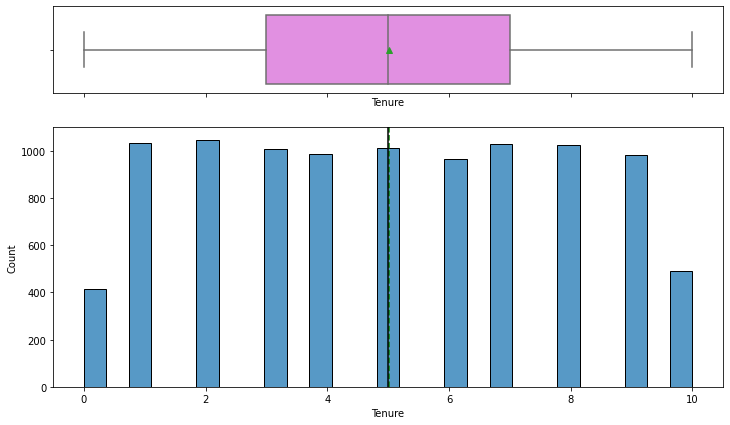

In [ ]:
histogram_boxplot(data,"Tenure")

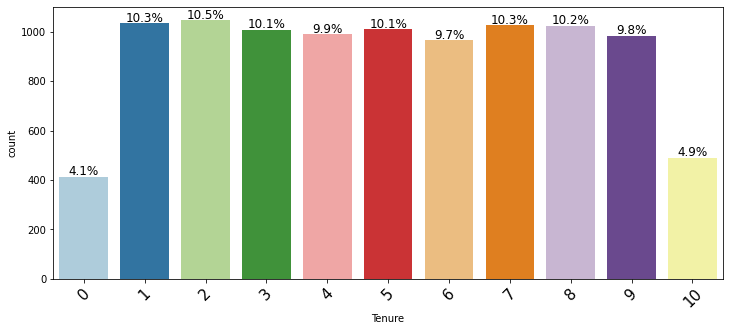

In [ ]:
labeled_barplot(data, "Tenure", perc=True)

The dataset seem to have well balanced data from each of the Tenure years apart from 0 and 10 years.

### Balance

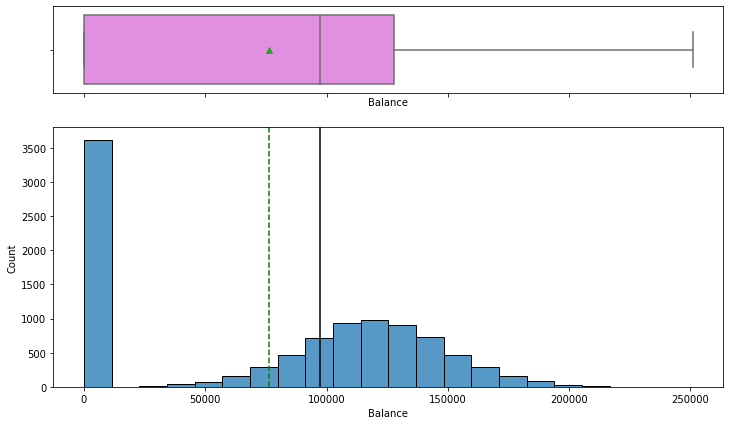

In [ ]:
histogram_boxplot(data,"Balance")

* If we exclude the 0s in "Balance" then the dataset is perfectly normally distributed.
* The 0s in "Balance" are pushing the mean and the median to the left.
* These values could be intentional as the customers might not have been comfortable sharing the bank balance.  
Let us examine these values.

In [ ]:
data_zero_balance = data[data['Balance'] == 0]

In [ ]:
data_zero_balance

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


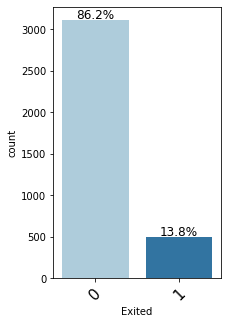

In [ ]:
labeled_barplot(data_zero_balance, "Exited", perc=True)

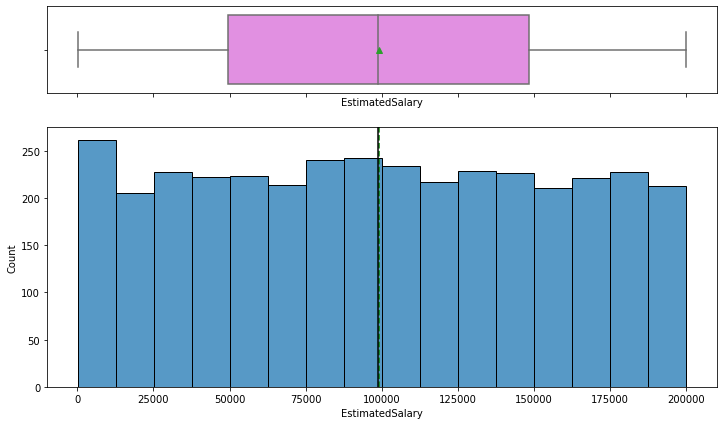

In [ ]:
histogram_boxplot(data_zero_balance,"EstimatedSalary")

In [ ]:
data_zero_balance[data_zero_balance['EstimatedSalary'] <= 10000]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
23,15725737,669,France,Male,46,3,0.0,2,0,1,8487.75,0
58,15623944,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
84,15738751,493,France,Female,46,4,0.0,2,1,0,1907.66,0
99,15633059,413,France,Male,34,9,0.0,2,0,0,6534.18,0
126,15671137,549,France,Female,52,1,0.0,1,0,1,8636.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9745,15603883,818,France,Male,36,4,0.0,2,1,1,8037.03,0
9835,15616172,838,France,Male,31,2,0.0,2,1,0,8222.96,0
9875,15747130,521,France,Male,39,7,0.0,2,0,1,653.58,0
9881,15621021,687,Spain,Female,40,1,0.0,2,1,0,8207.36,0


Taking a look at the "EstimatedSalary" for the customers with 0 balance, the Estimated salary ranges upto 200000, so clearly these values cannot be True. It further confirms the assumption that the Customers might not have been comfortable sharing this data. Hence, let us not treat these values.

### NumOfProducts

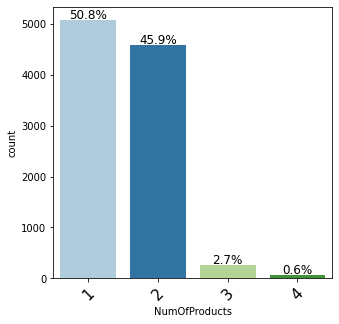

In [ ]:
labeled_barplot(data, "NumOfProducts", perc=True)

Atleast 50% of the customers use 1 product and around 46% use 2 products. The number of customers who use 3 or 4 products is very less.

### HasCrCard

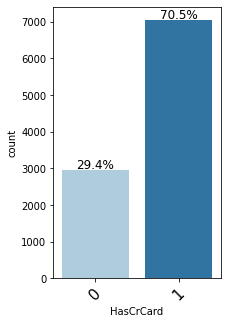

In [ ]:
labeled_barplot(data, "HasCrCard", perc=True)

* Around 70% of the customers in this bank have a credit card.
* Earlier, we saw that some people did not good credit score, let us see if it is because of not having a credit card.  

In [ ]:
data_no_crcard = data[data['HasCrCard'] == 0]

In [ ]:
data_no_crcard['CreditScore'].describe()

count    2945.000000
mean      651.345331
std        96.637830
min       350.000000
25%       581.000000
50%       654.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

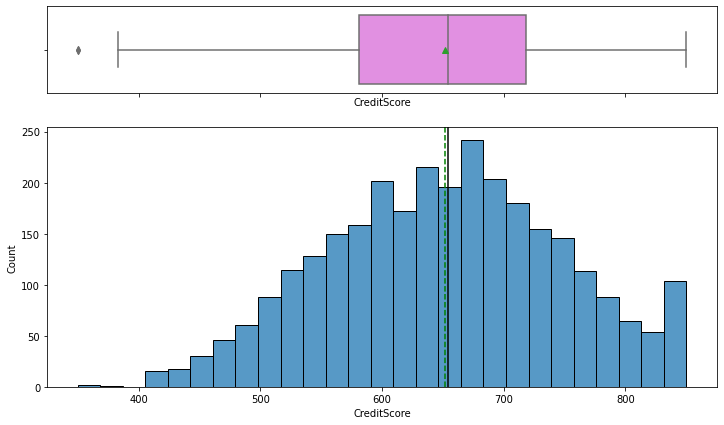

In [ ]:
histogram_boxplot(data_no_crcard,"CreditScore")

* Looks like only one of these customers have a low credit score. These customers might have a credit card with some other banks. So, it is safe to conclude that this variable - **HasCrCard** corresponds to having/not having a credit card from this bank

### IsActiveMember

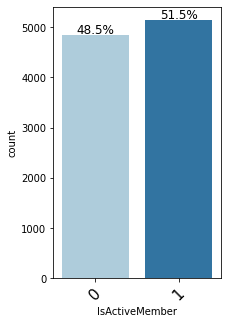

In [ ]:
labeled_barplot(data, "IsActiveMember", perc=True)

Almost only 50% of customers are active.

### EstimatedSalary

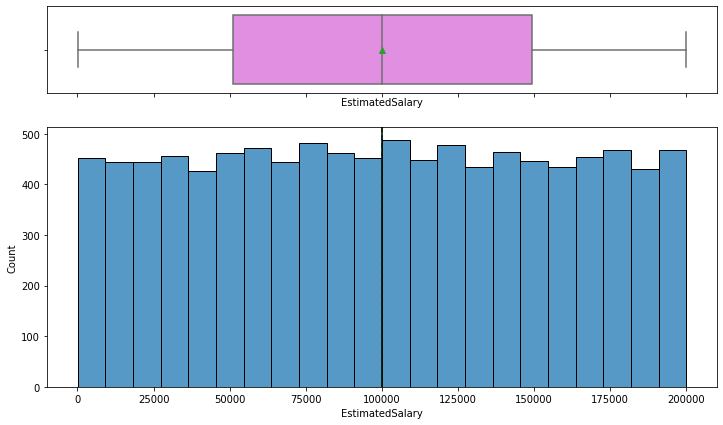

In [ ]:
histogram_boxplot(data,"EstimatedSalary")

The Estimated Salary variable is equally distributed.

### Exited

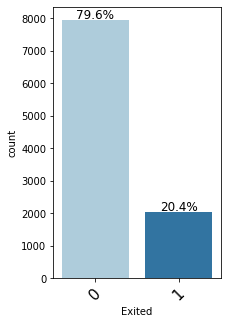

In [ ]:
labeled_barplot(data, "Exited", perc=True)

As discussed earlier, the dataset is imbalanced for out target variable with about 80:20 split. Only 20% of the customers in this dataset have churned.

### Bi-Variate Analysis:

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### CreditScore vs Exited


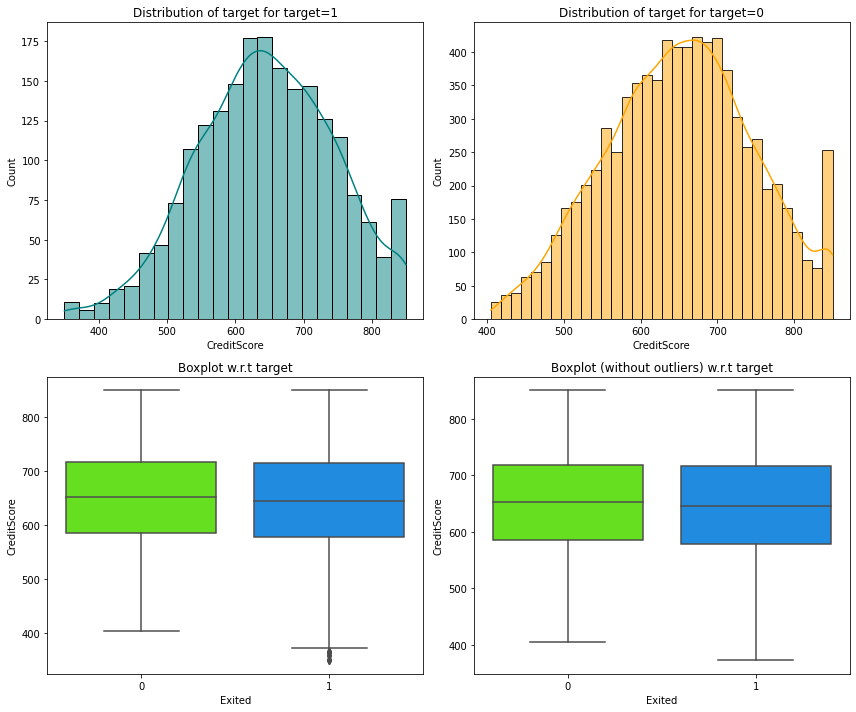

In [ ]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

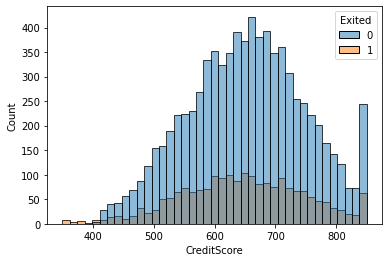

In [ ]:
sns.histplot(data=data,x="CreditScore",hue="Exited");

* The distribution for Credit Score looks almost the same with respect to Exited.
* As seen in Univariate Analysis, customers with lower credir score have exited/churned.   

### Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


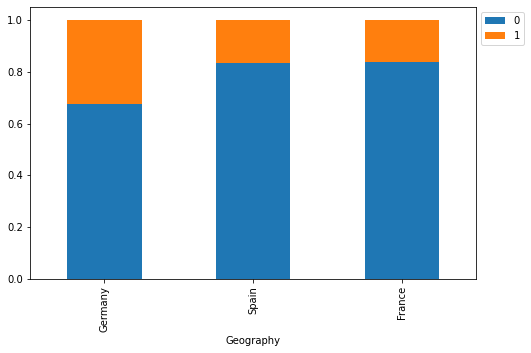

In [ ]:
stacked_barplot(data, "Geography", "Exited")

* Customers in Germany have churned the most with about 32%
* Customers in France and Spain have churned more or less equally when percentage is considered about 16%.

### Gender vs Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


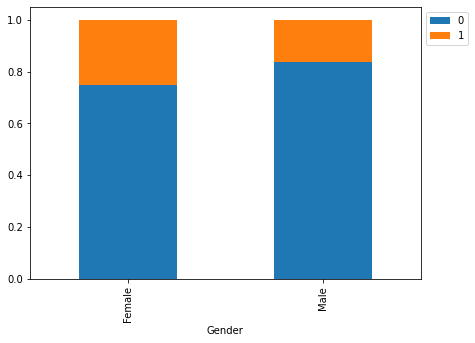

In [ ]:
stacked_barplot(data, "Gender", "Exited")

* The number of Female customers is slightly less in the dataset but have churned the most - about 25%
* Male customers have churned by around 16%

### Age vs Exited

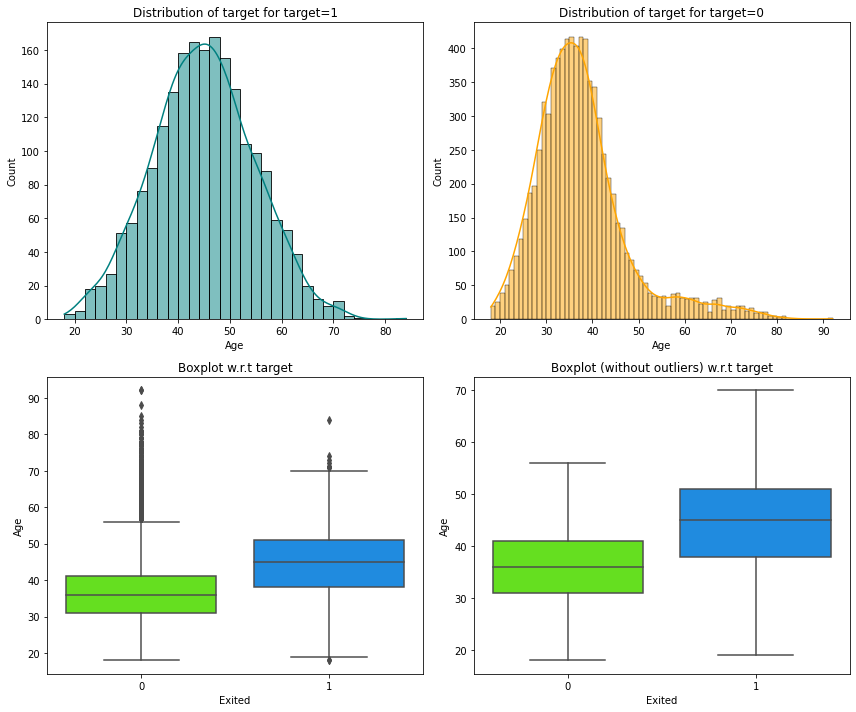

In [ ]:
distribution_plot_wrt_target(data, "Age", "Exited")

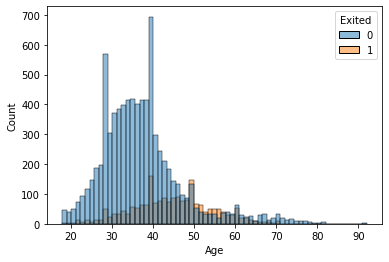

In [ ]:
sns.histplot(data=data,x="Age",hue="Exited");

* From the data for Age, customer who churn have higher mean age at about 45

### Tenure vs Exited

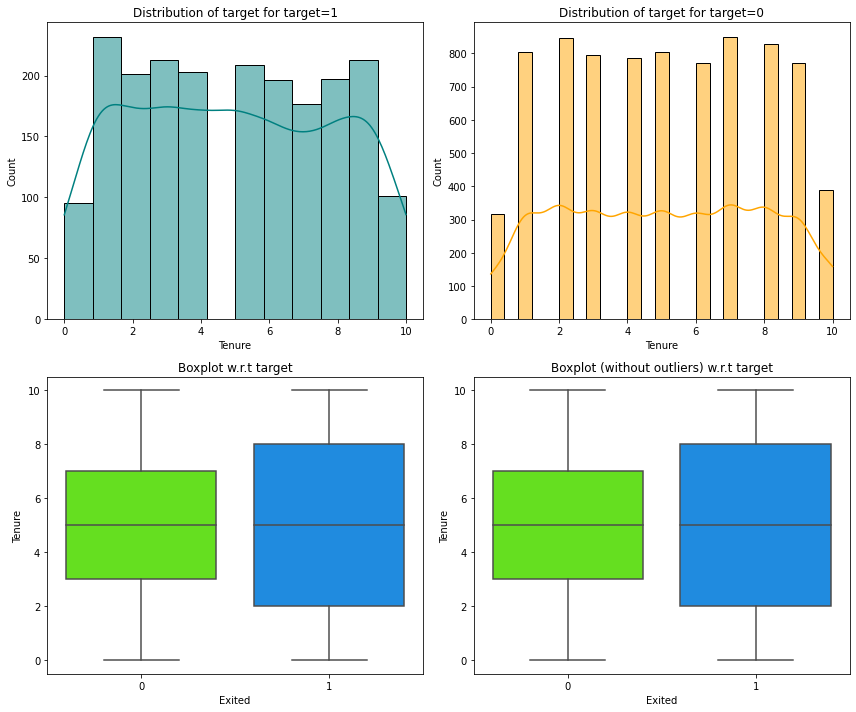

In [ ]:
distribution_plot_wrt_target(data, "Tenure", "Exited")

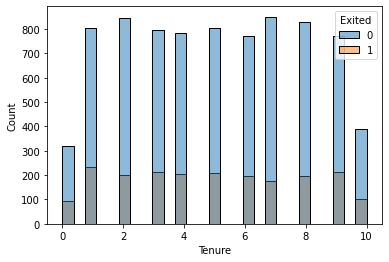

In [ ]:
sns.histplot(data=data,x="Tenure",hue="Exited");

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


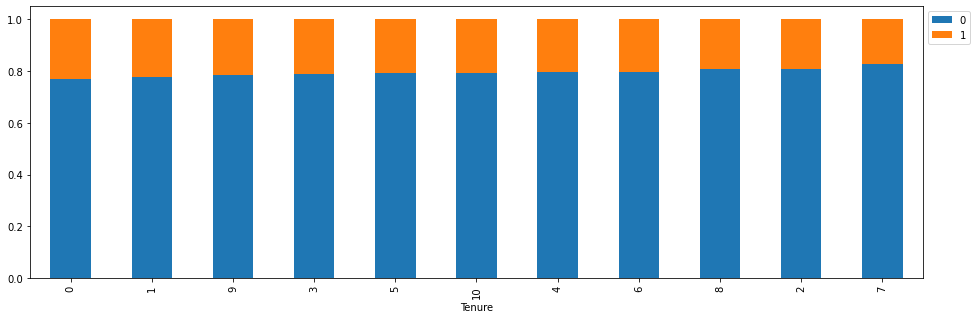

In [ ]:
stacked_barplot(data, "Tenure" ,"Exited")

* The churn percentage is equally distributed across all Tenure Years.

### Balance vs Exited

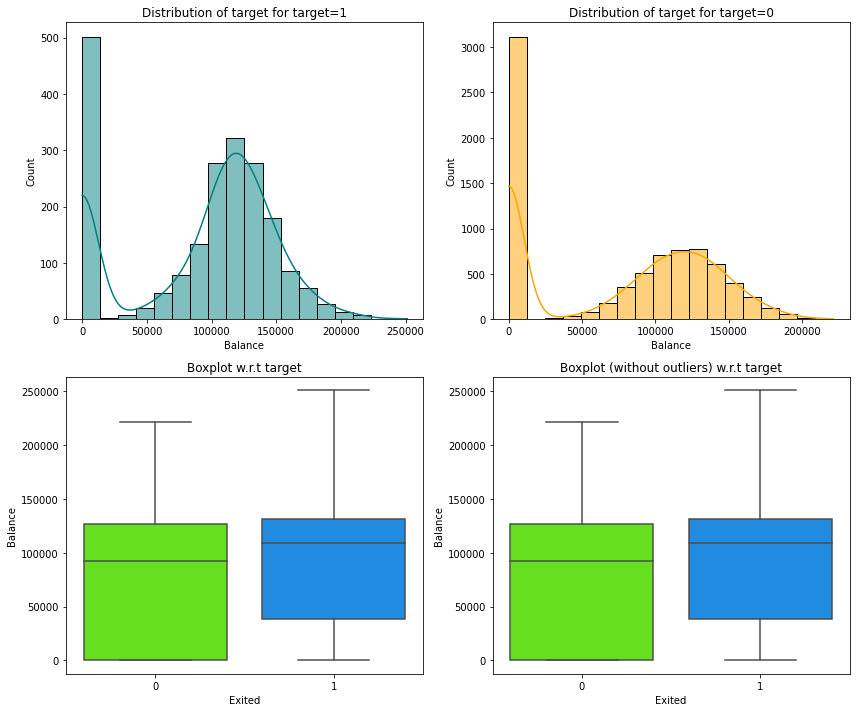

In [ ]:
distribution_plot_wrt_target(data, "Balance", "Exited")

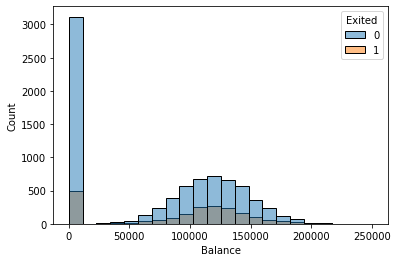

In [ ]:
sns.histplot(data=data,x="Balance",hue="Exited");

* The percentage of customers who have churned is almost equally distributed for the Balance variable.

### NumOfProducts

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


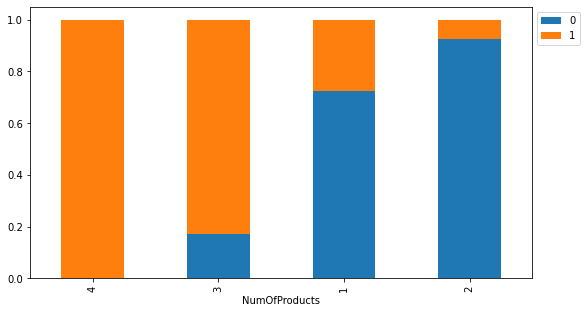

In [ ]:
stacked_barplot(data, "NumOfProducts" ,"Exited")

* Interestingly, all the customers with 4 prodcuts have churned.
* About 83% of the customers with 3 products have churned.
* About 27% of the customers with 1 product have churned
* About 7.5% of the customers with 2 products have churned.
* So, we can say that 2 products is the sweet spot. Customers with 1 product or more porducts tend to churn.

### HasCrCard vs Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


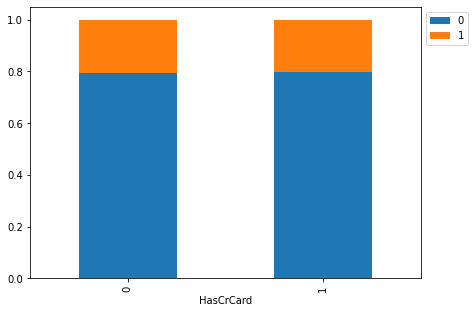

In [ ]:
stacked_barplot(data, "HasCrCard" ,"Exited")

* When percentage churned is considered, customers with or without credit card have churned equally.

### IsActiveMember vs Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


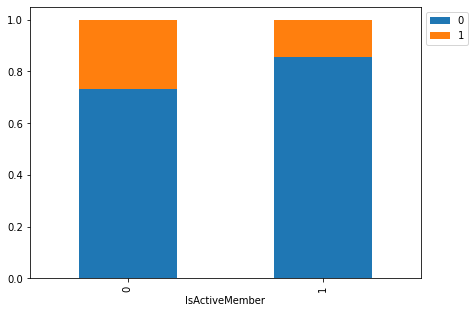

In [ ]:
stacked_barplot(data, "IsActiveMember" ,"Exited")

* Customers who is not active have churned the most - about 29%

### Estimated Salary vs Exited

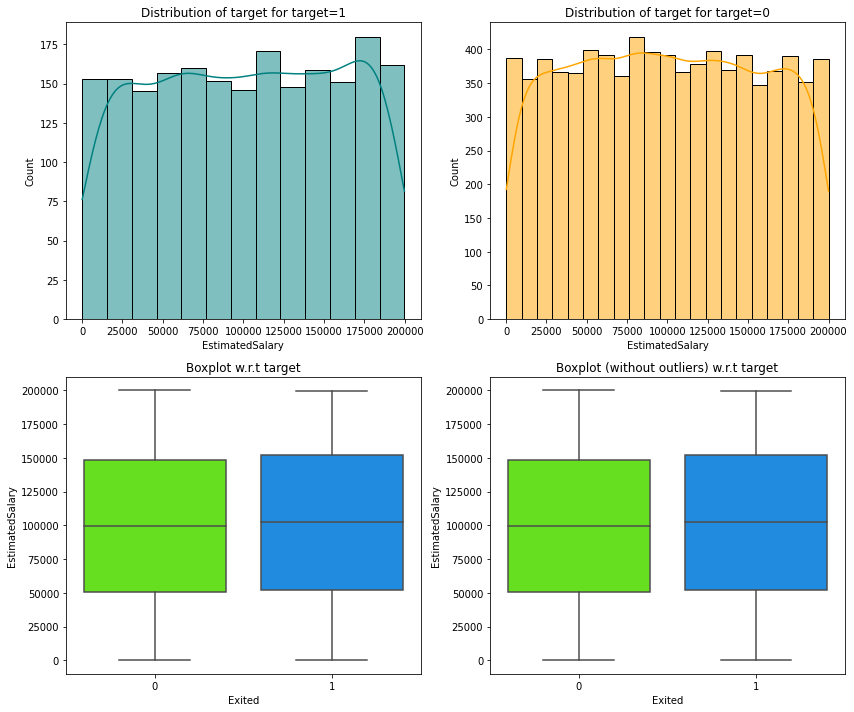

In [ ]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

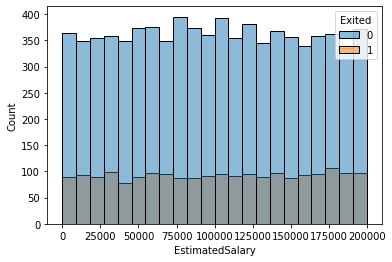

In [ ]:
sns.histplot(data=data,x="EstimatedSalary",hue="Exited");

* Customers who have churned is equally distributed for EstimatedSalary

**Summary from Univariate and Bivariate Analysis:**

**Univariate Analysis Summary:**

* Looking at the customers with lower CreditScore:
  * Most of these customers have 0 balance. This could be actually be true or this could be from the fact that "Customer was interested in sharing the bank balance". The later is likely to be true from the "EstimatedSalary" variable.
  * **Surprisingly, all these outlier customers for CreditScore have exited the bank/churned.**
  * We also do not have enough evidence to prove why the credit score is low for these customers as creditscore depend upon so any factors like credit history, no of credit cards, etc and we do not have such variables in our dataset for out analysis.
  * As we do not have more justifications and since these customers data look legit, let us not treat these outliers.

* 50% of the customers are from France.

* There are more Male customers than Female

* There are 411 datapoints with Age higher than the Upper whisker value.
* Although, there aren't sufficient variables to provide justifications to these outliers, taking a look at the Salary, Tenure, CreditScore gives us a good indication that these outliers are valid assuming that the Salary, Tenure and CreditScore all would go up with age.
* The distribution of these customers to have churned is similar to the ditribution to the whole dataset.

* The dataset seem to have well balanced data from each of the Tenure years apart from 0 and 10 years.

* If we exclude the 0s in "Balance" then the dataset is perfectly normally distributed.
* The 0s in "Balance" are pushing the mean and the median to the left.
* These values could be intentional as the customers might not have been comfortable sharing the bank balance.  
Let us examine these values.
Taking a look at the "EstimatedSalary" for the customers with 0 balance, the Estimated salary ranges upto 200000, so clearly these values cannot be True. It further confirms the assumption that the Customers might not have been comfortable sharing this data. Hence, let us not treat these values.

* Atleast 50% of the customers use 1 product and around 46% use 2 products. The number of customers who use 3 or 4 products is very less.
* Around 70% of the customers in this bank have a credit card.
* Earlier, we saw that some people did not good credit score, let us see if it is because of not having a credit card.
* Looks like only one of these customers have a low credit score. These customers might have a credit card with some other banks. So, it is safe to conclude that this variable - **HasCrCard** corresponds to having/not having a credit card from this bank

* Almost only 50% of customers are active.

* The Estimated Salary variable is equally distributed.

* **As discussed earlier, the dataset is imbalanced for out target variable with about 80:20 split. Only 20% of the customers in this dataset have churned.**

**Bi-variate Summary:**

* The distribution for Credit Score looks almost the same with respect to Exited.
* As seen in Univariate Analysis, customers with lower credir score have exited/churned.  

* Customers in Germany have churned the most with about 32%
* Customers in France and Spain have churned more or less equally when percentage is considered about 16%.

* From the data for Age, customer who churn have higher mean age at about 45

* The churn percentage is equally distributed across all Tenure Years.

* The percentage of customers who have churned is almost equally distributed for the Balance variable.

* Interestingly, all the customers with 4 prodcuts have churned.
* About 83% of the customers with 3 products have churned.
* About 27% of the customers with 1 product have churned
* About 7.5% of the customers with 2 products have churned.
* So, we can say that 2 products is the sweet spot. Customers with 1 product or more products tend to churn.


* When percentage churned is considered, customers with or without credit card have churned equally.

* Customers who is not active have churned the most - about 29%

* Customers who have churned is equally distributed for EstimatedSalary



  








### Multi-Variate Analysis

In [ ]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation = 45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

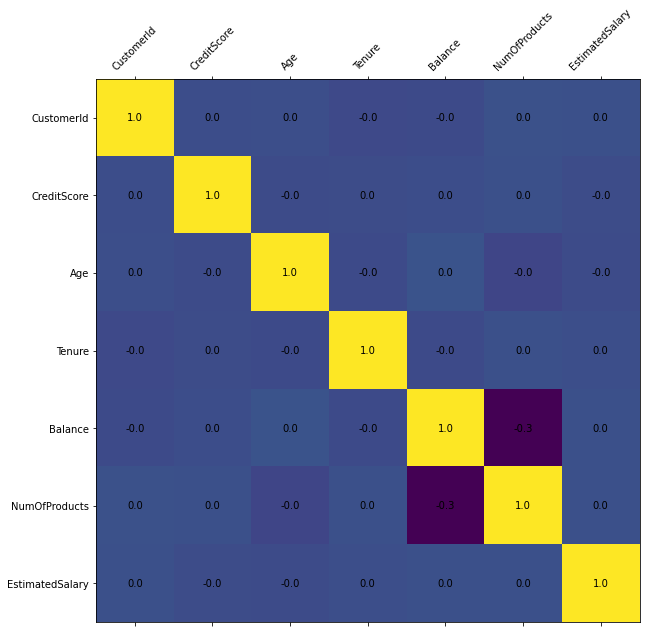

In [ ]:
plot_corr(data)

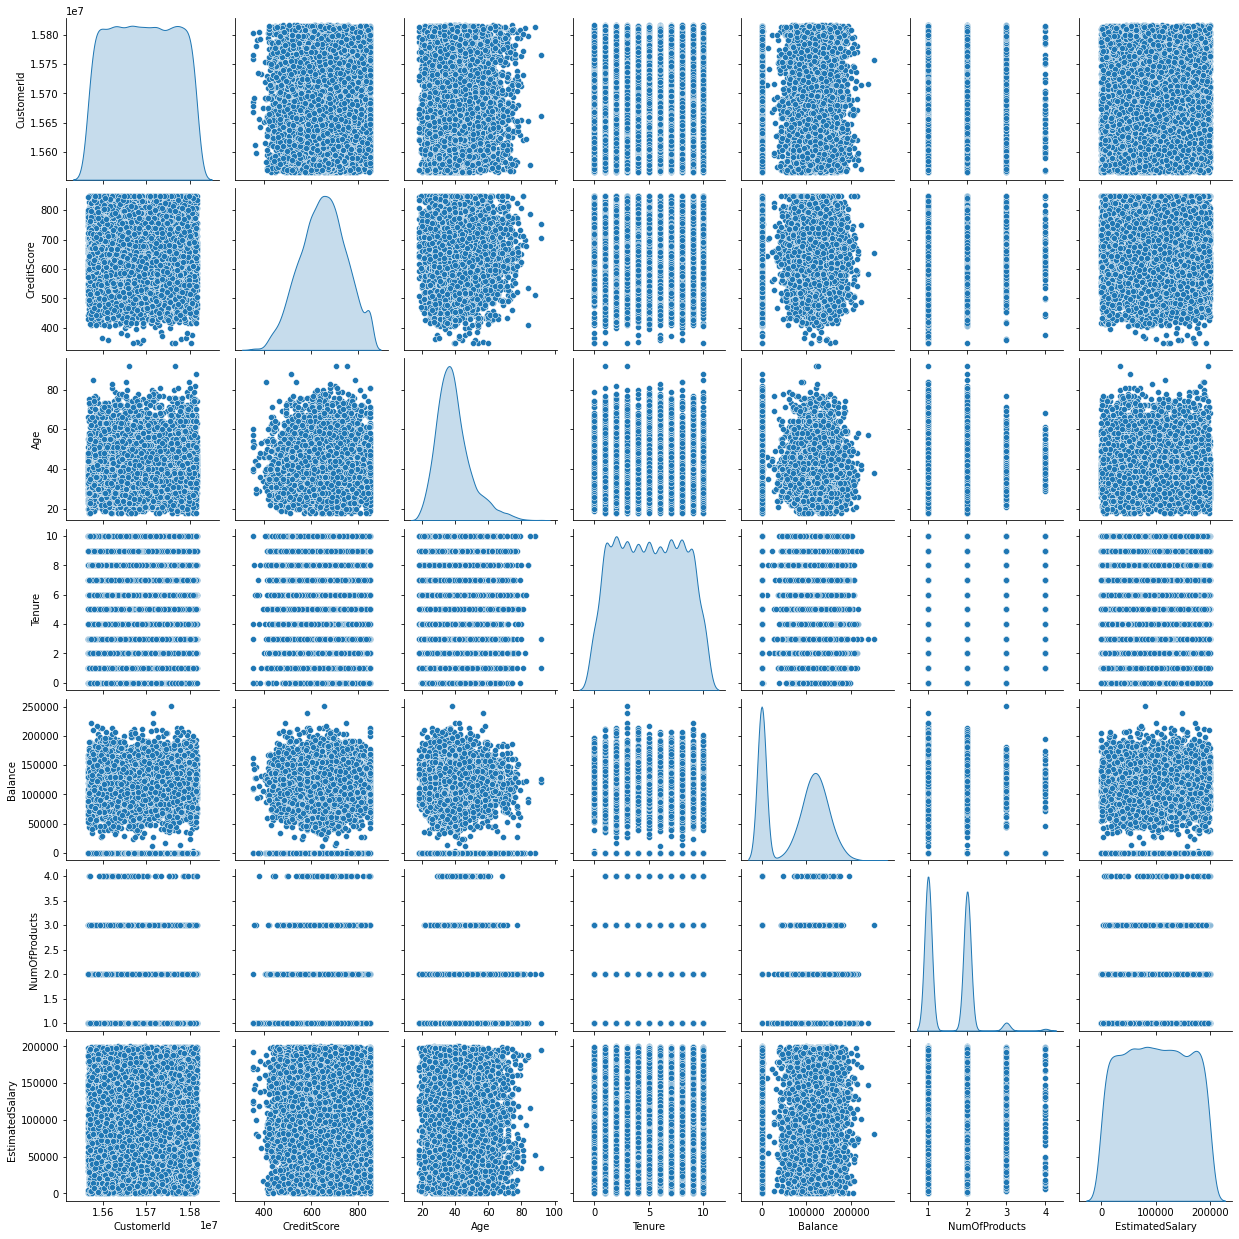

In [ ]:
sns.pairplot(data,diag_kind='kde');

* There are almost 0 correlation between variables except for slight negative correlation of 0.3 between NumOfProducts and Balance

### Data Preparation

In [ ]:
df = data.copy()

In [ ]:
data = data.drop('CustomerId',axis=1)

In [ ]:
data.shape

(10000, 11)

In [ ]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
X = data.drop('Exited',axis=1)

In [ ]:
Y = data[['Exited']]

In [ ]:
Y.sample(10)

,Exited
6260,0
3234,1
3078,0
1827,1
4687,0
2156,0
2101,0
6968,0
6189,0
2363,0


Splitting the Dataset to Train and Test:

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

Normalizing

We will standardize the X variables only. Since this is a classification problem, our target variable need not be standardized

In [ ]:
sc = StandardScaler()
temp = sc.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = temp.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = temp.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [ ]:
X_train.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8876,-0.979591,Spain,Male,0.662138,-0.695292,0.889056,-0.912483,1,1,0.157263
6553,-0.130137,Germany,Male,1.040417,-1.386929,0.422174,-0.912483,1,0,1.199250
2384,0.843628,France,Female,0.094718,1.725435,-1.223574,0.799493,1,0,0.952573
7845,-0.026545,France,Male,-0.472701,-1.732747,-1.223574,-0.912483,1,1,1.191796
9216,0.760754,France,Male,-0.850980,1.725435,-1.223574,0.799493,1,1,-0.786821


In [ ]:
X_test.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5061,-0.181933,France,Female,0.283858,-1.386929,-1.223574,0.799493,1,0,-0.741561
1787,0.190998,France,Male,-1.323829,-1.386929,1.307262,-0.912483,0,0,-1.077899
8405,-0.699893,France,Male,0.094718,-0.695292,-1.223574,0.799493,1,0,-0.900622
6195,-1.414677,France,Female,0.189288,0.687981,-1.223574,0.799493,1,1,-1.666043
5246,-1.342163,France,Female,-0.661840,-1.041110,0.965856,0.799493,1,1,0.520249


In [ ]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

One-hot encoding

In [ ]:
cat_data = ['Geography','Gender','HasCrCard','IsActiveMember']

In [ ]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train,columns=cat_data,drop_first= True)
X_test = pd.get_dummies(X_test,columns=cat_data,drop_first= True)

In [ ]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 11)
(7000, 1)
(3000, 11)
(3000, 1)


## Model Building

**A model can make wrong predictions in the following ways:**
* Predicting a customer could churn, when he/she would not leave the bank.
* Predicting a customer would not churn, when he/she actually leaves the bank.

**Model Evaluation Criterion:**

Before Model Building, let us focus on what performance parameter we should focus on - so that we can try to optimize the model based on that performance parameter.

In our case,

**False Positives**: We predict a customer would churn, but in reality he/she does not churn.

**False Negatives**: We predict a customer would not churn, but in reality he/she churns.

In our case, if we predict a customer would not churn but in reality the customer churns, we failed to predict it and the bank would not take the necessary steps to attract those customers or taken necessary steps to prevent a customer form leaving the bank. Therefore, we want less or zero False Negatives. Therefore, Recall has to be maximized.


### Model 0

* Model 0 is with only 2 hidden layers: 64 layers on the first one and 32 on the second one with ReLU activation for both the layers.
* The optimizer used is SGD - which samples the data for training
* For predicting, we will use a default 0.5 cutoff

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(64,activation = 'relu'))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train,validation_split=0.3,batch_size=32,epochs=50,verbose=1)

Epoch 1/50
154/154 [==============================] - 1s 5ms/step - loss: 0.5248 - accuracy: 0.7890 - val_loss: 0.4893 - val_accuracy: 0.7886
Epoch 2/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7996 - val_loss: 0.4719 - val_accuracy: 0.7886
Epoch 3/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8004 - val_loss: 0.4610 - val_accuracy: 0.7890
Epoch 4/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8010 - val_loss: 0.4528 - val_accuracy: 0.7886
Epoch 5/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8018 - val_loss: 0.4465 - val_accuracy: 0.7910
Epoch 6/50
154/154 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8041 - val_loss: 0.4413 - val_accuracy: 0.7962
Epoch 7/50
154/154 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8071 - val_loss: 0.4367 - val_accuracy: 0.7986
Epoch 

 * The accuracy on the training and the validation seem to be similar for this model around 79%
 * Let use see the recall value as recall is our primary focus

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


* The model summary above gives us the output shape and parameters at each of the layers.
* We have 2 layers: At the begining of the 1st layer, it gets input from our input variables = 12 in our case. Since there are 64 nodes at the first layer the nmumber of parameters is calculated as (12 x 64) + 64 for the bias term = 832.
* Similarly for the 2nd hidden layer, it is (64 x 32) + 32 = 2080

94/94 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8600


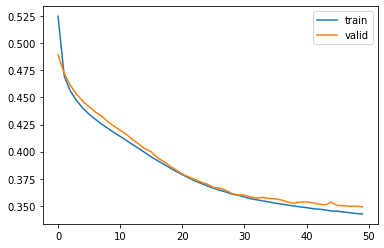

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

* The validation loss function and training loss function does not see, to converge at all.
* The validation loss function seems to be higher than the training loss function indicating there could be some overfitting

Let us see the metrics

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

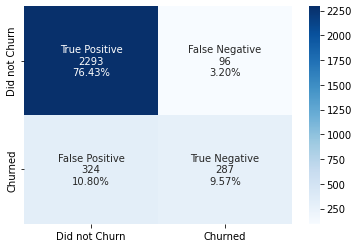

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

From the metrics, the False Negative (recall) is 0% which is our primary metric. This could be because of the threshold setting to 0.5.

Let us see if this could be improved by using AUC-ROC curve

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.47      0.58       611

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



The 0 recall for the 1st class could be because of the imbalanced data, that the model is trained perfectlt for the did not churn case and it poorly performs for the churned case.  

Let us try other models.

### Model 1

* In this model, we wil use 4 hidden layers with 256, 128, 64 and 32 number of nodes on each layer respectively and the activation function as ReLU
* We will use Adam Optimizer with learning rate = 0.001

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.33)

Epoch 1/50
74/74 [==============================] - 1s 6ms/step - loss: 0.4417 - accuracy: 0.8089 - val_loss: 0.3803 - val_accuracy: 0.8390
Epoch 2/50
74/74 [==============================] - 0s 4ms/step - loss: 0.3604 - accuracy: 0.8520 - val_loss: 0.3670 - val_accuracy: 0.8412
Epoch 3/50
74/74 [==============================] - 0s 4ms/step - loss: 0.3539 - accuracy: 0.8552 - val_loss: 0.3627 - val_accuracy: 0.8390
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8637 - val_loss: 0.3665 - val_accuracy: 0.8412
Epoch 5/50
74/74 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8680 - val_loss: 0.3866 - val_accuracy: 0.8455
Epoch 6/50
74/74 [==============================] - 0s 4ms/step - loss: 0.3195 - accuracy: 0.8720 - val_loss: 0.3663 - val_accuracy: 0.8425
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8665 - val_loss: 0.3767 - val_accuracy: 0.8425
Epoch 8/50
74/74 [==

The validation accuracy and the training accuracy seem to be the same as Model 0 around 79%.

Let us see the loss function and other metrics.

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


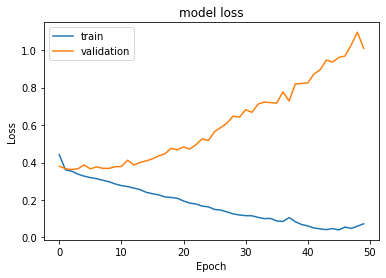

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

This model clearly did not work out, the loss function on the training data is decreasing while the loss function on the validation data is increasing.

Let us take a look at Recall score to evaluate the model.

We will use the ROC curve to find the best threshold value for the y predict variable.

In [ ]:
model1.predict(X_test)

array([[1.4965575e-08],
       [5.8823466e-02],
       [2.4132149e-05],
       ...,
       [2.1985883e-01],
       [8.5431206e-01],
       [1.8129878e-08]], dtype=float32)

Best Threshold=0.068718, G-Mean=0.721


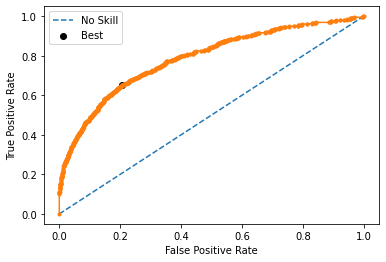

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The best threshold from the ROC is 0.068718

In [ ]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

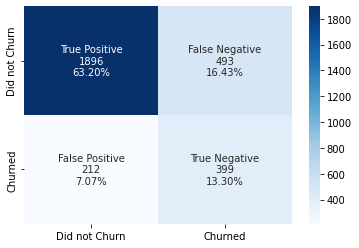

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      2389
           1       0.45      0.65      0.53       611

    accuracy                           0.77      3000
   macro avg       0.67      0.72      0.69      3000
weighted avg       0.81      0.77      0.78      3000



The recall score for this model looks decent but from the loss function we saw that the model was clearly overfitting data.


### Model 2

* In this model, we will use 3 hidden layers with 128,64,32 nodes at each layer
* We will also use BatchNormalization, which normalises the output before feeding in to the next layer
* Adam as Optimizer with learning rate = 0.001
* We will run 100 epochs with batch size 128

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
history_2 = model2.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split = 0.33)

Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 0.5640 - accuracy: 0.7072 - val_loss: 0.5499 - val_accuracy: 0.8066
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.8458 - val_loss: 0.4667 - val_accuracy: 0.8100
Epoch 3/100
37/37 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.8601 - val_loss: 0.4294 - val_accuracy: 0.8083
Epoch 4/100
37/37 [==============================] - 0s 7ms/step - loss: 0.3303 - accuracy: 0.8682 - val_loss: 0.4130 - val_accuracy: 0.8144
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.3217 - accuracy: 0.8678 - val_loss: 0.4051 - val_accuracy: 0.8209
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.8716 - val_loss: 0.3963 - val_accuracy: 0.8248
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.3064 - accuracy: 0.8723 - val_loss: 0.3903 - val_accuracy: 0.8291
Epoch 8/100


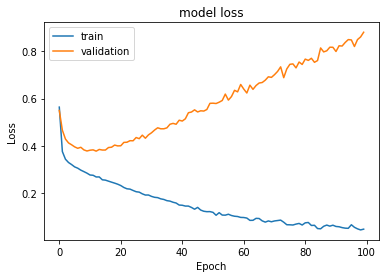

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

This time even with 100 epochs the loss function for the validation data has not gone upto 1 whereas in the previous model, the loss function was at 1 even with 50 epochs. However, the loss function for validation is not decreasing. Hence not converging with the training data.

Let us see other metrics and try building different models

Best Threshold=0.006213, G-Mean=0.711


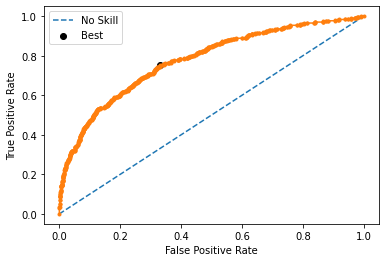

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

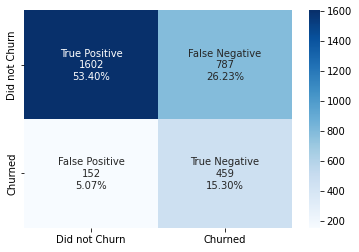

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      2389
           1       0.37      0.75      0.49       611

    accuracy                           0.69      3000
   macro avg       0.64      0.71      0.63      3000
weighted avg       0.80      0.69      0.72      3000



The F1 score and the recall score have both decreased with batchnormalization. Hence this is not a good model.

### Model 3

* In this model we will have 3 layers with 128,64,32 nodes in each layer with ReLU as activation function
* we will use dropout with dropout value as 0.5
* Adam as optimizer with learning rate = 0.001

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.5))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
88/88 [==============================] - 2s 12ms/step - loss: 0.5097 - accuracy: 0.7832 - val_loss: 0.4487 - val_accuracy: 0.7921
Epoch 2/50
88/88 [==============================] - 1s 7ms/step - loss: 0.4608 - accuracy: 0.7975 - val_loss: 0.4331 - val_accuracy: 0.7921
Epoch 3/50
88/88 [==============================] - 1s 6ms/step - loss: 0.4419 - accuracy: 0.8021 - val_loss: 0.4101 - val_accuracy: 0.8257
Epoch 4/50
88/88 [==============================] - 1s 7ms/step - loss: 0.4251 - accuracy: 0.8148 - val_loss: 0.3857 - val_accuracy: 0.8400
Epoch 5/50
88/88 [==============================] - 1s 14ms/step - loss: 0.4139 - accuracy: 0.8243 - val_loss: 0.3777 - val_accuracy: 0.8514
Epoch 6/50
88/88 [==============================] - 1s 8ms/step - loss: 0.3987 - accuracy: 0.8325 - val_loss: 0.3730 - val_accuracy: 0.8493
Epoch 7/50
88/88 [==============================] - 1s 12ms/step - loss: 0.3899 - accuracy: 0.8339 - val_loss: 0.3580 - val_accuracy: 0.8493
Epoch 8/50
88/88 

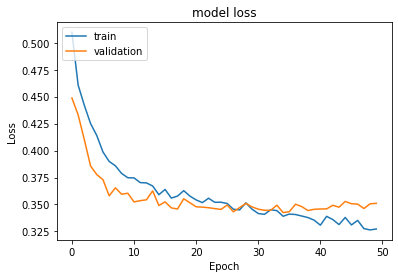

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We can see that the validation loss function and the training loss function start to converge. Although there are some noise in the loss function.

Let us look at the metrics.

Best Threshold=0.248935, G-Mean=0.789


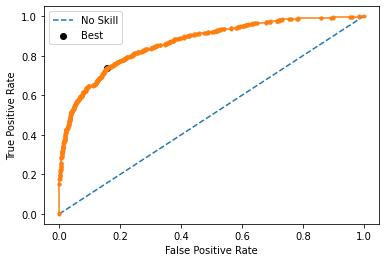

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

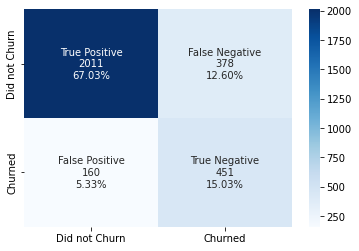

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2389
           1       0.54      0.74      0.63       611

    accuracy                           0.82      3000
   macro avg       0.74      0.79      0.75      3000
weighted avg       0.85      0.82      0.83      3000



Of all the models we have built, this seems to be a good model with decent recall value and good accuracy.

### Model 4

* In this model, let us use hyperparameter tuning to find out the best batch size among 32,64,128 and the learning rate among 0.01,0.1,0.001
* We will use 4 hidden layers each with dropout of 0.5 and 256,128,64,32 nodes on each layer with ReLU as activation function.
* We will continue to use Adam as our optimizer

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.5))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
175/175 [==============================] - 1s 4ms/step - loss: 0.4769 - accuracy: 0.8050 - val_loss: 0.4104 - val_accuracy: 0.8193
Best: 0.801858 using {'lr': 0.01, 'batch_size': 32}


From the Hyperparameter tuning we have the best batch size as 32 and the best learning rate as 0.01. Let us use these parameters to fit the model.

In [ ]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
175/175 [==============================] - 1s 4ms/step - loss: 0.4869 - accuracy: 0.7996 - val_loss: 0.4108 - val_accuracy: 0.8186
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 0.8202 - val_loss: 0.3958 - val_accuracy: 0.8393
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8284 - val_loss: 0.3712 - val_accuracy: 0.8521
Epoch 4/50
175/175 [==============================] - 1s 4ms/step - loss: 0.4058 - accuracy: 0.8282 - val_loss: 0.3768 - val_accuracy: 0.8386
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8293 - val_loss: 0.3642 - val_accuracy: 0.8457
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8302 - val_loss: 0.3791 - val_accuracy: 0.8286
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8348 - val_loss: 0.3683 - val_accuracy: 0.8414
Epoch 

In [ ]:
estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

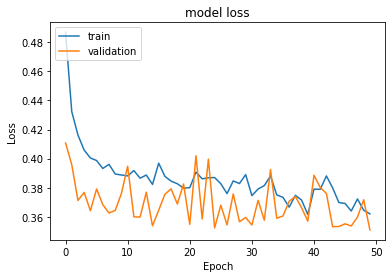

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Although the loss fucntion seem to be low, there is so much noise in the training loss function and the validation loss function

Best Threshold=0.203507, G-Mean=0.776


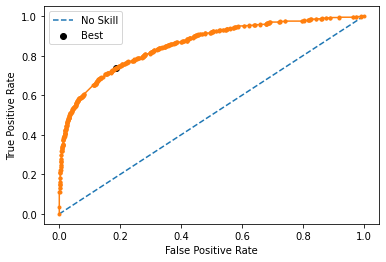

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

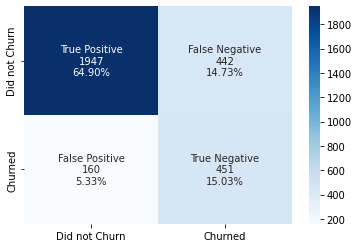

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.92      0.81      0.87      2389
           1       0.51      0.74      0.60       611

    accuracy                           0.80      3000
   macro avg       0.71      0.78      0.73      3000
weighted avg       0.84      0.80      0.81      3000



Although this model has decent accuracy and recall value, this is not as good as the previous model.

### Model 5

* In this model, We will use the GridSearch CV to search for the best batch size among 64,32,128 adn the best learning rate among 0.01,0.1,0.001
* We will use 4 hidden layers each with dropout of 0.8 and 256,128,64,32 nodes on each layer with ReLU as activation function.
* We will continue to use Adam as our optimizer

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v5(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.8))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.8))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.8))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
88/88 [==============================] - 1s 6ms/step - loss: 0.5729 - accuracy: 0.7755 - val_loss: 0.5792 - val_accuracy: 0.7921
Best: 0.796288 using {'batch_size': 64, 'lr': 0.01}
Total runtime of the program is 33.199387311935425


From Grid Search CV we have the best batch size as 64 and the best learning rate as 0.01. Let us fit the model with these parameters.

In [ ]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
88/88 [==============================] - 1s 6ms/step - loss: 0.5720 - accuracy: 0.7764 - val_loss: 0.5564 - val_accuracy: 0.7921
Epoch 2/50
88/88 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7961 - val_loss: 0.5451 - val_accuracy: 0.7921
Epoch 3/50
88/88 [==============================] - 0s 4ms/step - loss: 0.4873 - accuracy: 0.7973 - val_loss: 0.5406 - val_accuracy: 0.7921
Epoch 4/50
88/88 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7964 - val_loss: 0.5225 - val_accuracy: 0.7921
Epoch 5/50
88/88 [==============================] - 0s 4ms/step - loss: 0.4885 - accuracy: 0.7968 - val_loss: 0.5349 - val_accuracy: 0.7921
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7962 - val_loss: 0.5225 - val_accuracy: 0.7921
Epoch 7/50
88/88 [==============================] - 0s 5ms/step - loss: 0.4922 - accuracy: 0.7966 - val_loss: 0.5149 - val_accuracy: 0.7921
Epoch 8/50
88/88 [==

In [ ]:
estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

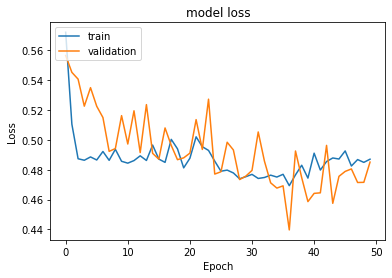

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

There is still so much noise in the loss function for the validation data.

Best Threshold=0.213806, G-Mean=0.728


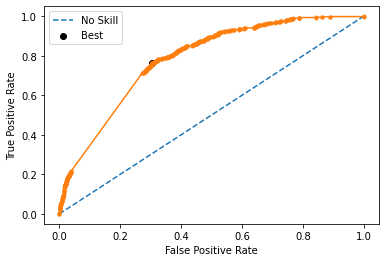

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

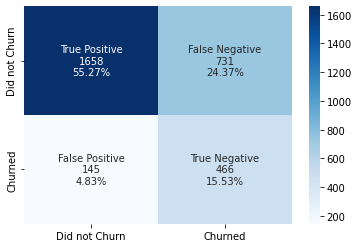

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      2389
           1       0.39      0.76      0.52       611

    accuracy                           0.71      3000
   macro avg       0.65      0.73      0.65      3000
weighted avg       0.81      0.71      0.73      3000



Clearly, the recall score and the accuracy have gone down.

Let us try using Dask for hyperparameter tuning

### Dask

In [ ]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [ ]:
def create_model_v6(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time

# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

175/175 [==============================] - 1s 4ms/step - loss: 0.4594 - accuracy: 0.8080 - val_loss: 0.3891 - val_accuracy: 0.8193
Best: 0.826286 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 87.73337173461914


The best batch_size is 32 and the learning rate is 0.01.

Let us try Keras Tuner

### Keras Tuner

In [ ]:
## Install Keras Tuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 10.3 MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

* In this model, we will also try to find the best no.of layers between 2 to 10 and the best no. of neurons for each layer between 32 to 256 and the best learning rate among 0.01,0.001,0.0001 using Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.8509523868560791

Best val_accuracy So Far: 0.8621428608894348
Total elapsed time: 00h 01m 38s


In [ ]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8621428608894348
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8585714300473531
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8580952485402426
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8509523868560791
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
uni

From the above summary, based on best accuracy: the best parameters are:
5 layers with 160,160,224,128,224 neurons in each layer and with the learning rate of 0.001

Let us build the model with these parameters as Model 6

### Model 6

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model6 = Sequential()
model6.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model6.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,665
Trainable params: 121,665
Non-trai

In [ ]:
history_6 = model6.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
175/175 [==============================] - 2s 5ms/step - loss: 0.4163 - accuracy: 0.8236 - val_loss: 0.3578 - val_accuracy: 0.8443
Epoch 2/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.8487 - val_loss: 0.3631 - val_accuracy: 0.8536
Epoch 3/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3546 - accuracy: 0.8543 - val_loss: 0.3540 - val_accuracy: 0.8507
Epoch 4/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3409 - accuracy: 0.8630 - val_loss: 0.3530 - val_accuracy: 0.8457
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8675 - val_loss: 0.3815 - val_accuracy: 0.8464
Epoch 6/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3234 - accuracy: 0.8657 - val_loss: 0.3800 - val_accuracy: 0.8429
Epoch 7/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8698 - val_loss: 0.3715 - val_accuracy: 0.8521
Epoch 

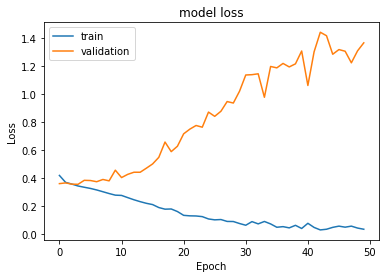

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The loss function on the training data has drastically reduced to almost 0, but the loss function on the validation data is increasing.

We will have problem if this model is implemented - the model will perform poorly for the new data

Best Threshold=0.009039, G-Mean=0.720


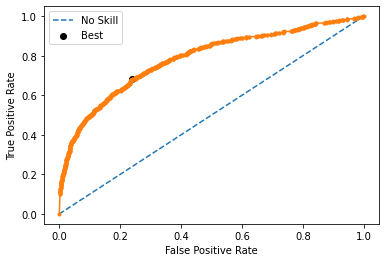

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat6 = model6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_test, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e6=model6.predict(X_test)
y_pred_e6 = (y_pred_e6 > thresholds6[ix])
y_pred_e6

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

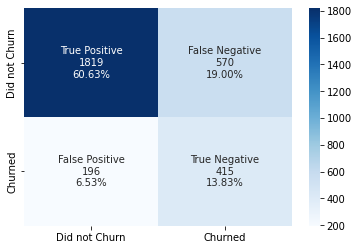

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_pred_e6)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm6,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e6)
print(cr6)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      2389
           1       0.42      0.68      0.52       611

    accuracy                           0.74      3000
   macro avg       0.66      0.72      0.67      3000
weighted avg       0.80      0.74      0.76      3000



The f1 score and the recall score is not as good as the model 3 with dropout.

Let us use the same model hyperparameters from Keras Tuner and with dropout

### Model 7

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dropout(0.5))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dropout(0.5))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dropout(0.5))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dropout(0.5))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
88/88 [==============================] - 3s 14ms/step - loss: 0.7202 - accuracy: 0.7320 - val_loss: 0.5846 - val_accuracy: 0.7929
Epoch 2/50
88/88 [==============================] - 1s 8ms/step - loss: 0.5743 - accuracy: 0.7741 - val_loss: 0.5673 - val_accuracy: 0.7936
Epoch 3/50
88/88 [==============================] - 1s 9ms/step - loss: 0.5355 - accuracy: 0.7855 - val_loss: 0.5297 - val_accuracy: 0.7921
Epoch 4/50
88/88 [==============================] - 1s 11ms/step - loss: 0.5194 - accuracy: 0.7882 - val_loss: 0.5029 - val_accuracy: 0.7907
Epoch 5/50
88/88 [==============================] - 1s 14ms/step - loss: 0.5046 - accuracy: 0.7909 - val_loss: 0.4975 - val_accuracy: 0.7921
Epoch 6/50
88/88 [==============================] - 1s 12ms/step - loss: 0.4972 - accuracy: 0.7941 - val_loss: 0.4741 - val_accuracy: 0.7914
Epoch 7/50
88/88 [==============================] - 1s 9ms/step - loss: 0.4813 - accuracy: 0.7927 - val_loss: 0.4645 - val_accuracy: 0.7943
Epoch 8/50
88/88

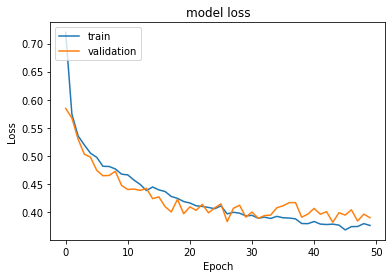

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Best Threshold=0.182236, G-Mean=0.777


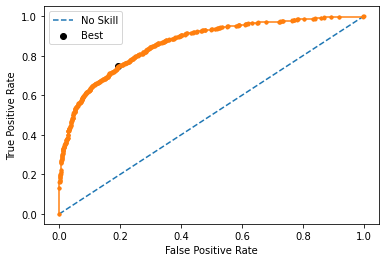

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

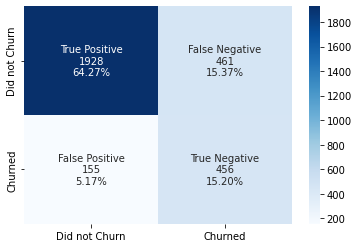

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm7,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2389
           1       0.50      0.75      0.60       611

    accuracy                           0.79      3000
   macro avg       0.71      0.78      0.73      3000
weighted avg       0.84      0.79      0.81      3000



Although this model performs decent, still the recall score and the f1 score is not as good as model 3

The poor performance of the models could be because of the imbalanced target variable. Let us use SMOTE along with Keras Tuner to find the optimum hyperparameters.

### SMOTE + Keras

In [ ]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [ ]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.7638266086578369

Best val_accuracy So Far: 0.8273542523384094
Total elapsed time: 00h 02m 22s


In [ ]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8273542523384094
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8100149432818095
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7911808490753174
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7721973061561584
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160


From the above analysis, we see that the hyperparameters with best accuracy are: 8 hidden layers with 160,64,192,32,224,96,192 neurons in each layer with a learning rate of 0.001

Let us fit a model with these parameters.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(192,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
140/140 [==============================] - 3s 9ms/step - loss: 0.5004 - accuracy: 0.7622 - val_loss: 0.5191 - val_accuracy: 0.7444
Epoch 2/50
140/140 [==============================] - 1s 7ms/step - loss: 0.4133 - accuracy: 0.8114 - val_loss: 0.4958 - val_accuracy: 0.7386
Epoch 3/50
140/140 [==============================] - 1s 7ms/step - loss: 0.3897 - accuracy: 0.8242 - val_loss: 0.5324 - val_accuracy: 0.7462
Epoch 4/50
140/140 [==============================] - 1s 9ms/step - loss: 0.3675 - accuracy: 0.8340 - val_loss: 0.4884 - val_accuracy: 0.7650
Epoch 5/50
140/140 [==============================] - 1s 7ms/step - loss: 0.3516 - accuracy: 0.8436 - val_loss: 0.3873 - val_accuracy: 0.8215
Epoch 6/50
140/140 [==============================] - 1s 7ms/step - loss: 0.3403 - accuracy: 0.8451 - val_loss: 0.3866 - val_accuracy: 0.8224
Epoch 7/50
140/140 [==============================] - 1s 10ms/step - loss: 0.3222 - accuracy: 0.8562 - val_loss: 0.4243 - val_accuracy: 0.8103
Epoch

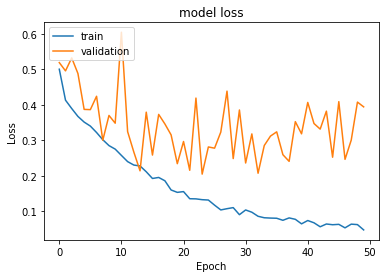

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We see that the validation data has so much noise and the loss function is increasing

Best Threshold=0.020540, G-Mean=0.736


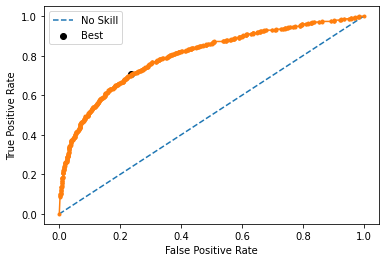

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e9=model9.predict(X_test)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

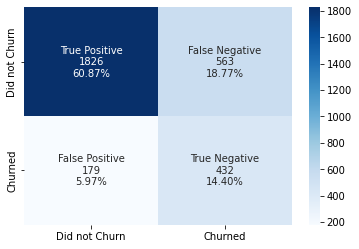

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_e9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm9,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr9=metrics.classification_report(y_test,y_pred_e9)
print(cr9)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2389
           1       0.43      0.71      0.54       611

    accuracy                           0.75      3000
   macro avg       0.67      0.74      0.68      3000
weighted avg       0.81      0.75      0.77      3000



Model 3 still performed better.

With SMOTE, although the F1 score has increased, the recall value still is lower compared to Model 3.

Let us use Grid Search CV and see if we can increase model's performance

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v7(lr,batch_size):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
88/88 [==============================] - 1s 6ms/step - loss: 0.4392 - accuracy: 0.8095 - val_loss: 0.3683 - val_accuracy: 0.8321


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.835001 using {'batch_size': 64, 'lr': 0.01}


In [ ]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
140/140 [==============================] - 4s 19ms/step - loss: 0.4940 - accuracy: 0.7665 - val_loss: 0.6997 - val_accuracy: 0.6520
Epoch 2/50
140/140 [==============================] - 2s 16ms/step - loss: 0.4568 - accuracy: 0.7930 - val_loss: 0.5112 - val_accuracy: 0.6834
Epoch 3/50
140/140 [==============================] - 2s 13ms/step - loss: 0.4475 - accuracy: 0.7965 - val_loss: 0.5531 - val_accuracy: 0.7381
Epoch 4/50
140/140 [==============================] - 1s 8ms/step - loss: 0.4389 - accuracy: 0.7976 - val_loss: 0.5330 - val_accuracy: 0.7444
Epoch 5/50
140/140 [==============================] - 1s 11ms/step - loss: 0.4310 - accuracy: 0.8029 - val_loss: 0.5253 - val_accuracy: 0.7520
Epoch 6/50
140/140 [==============================] - 1s 8ms/step - loss: 0.4294 - accuracy: 0.8068 - val_loss: 0.5079 - val_accuracy: 0.7471
Epoch 7/50
140/140 [==============================] - 1s 9ms/step - loss: 0.4208 - accuracy: 0.8120 - val_loss: 0.4645 - val_accuracy: 0.7283
Ep

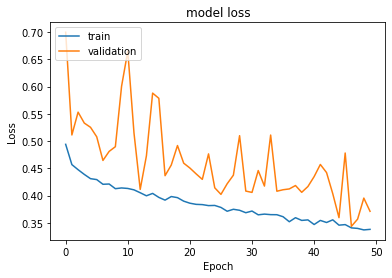

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The validation data's loss function still has noise but is decreasing

Best Threshold=0.383194, G-Mean=0.773


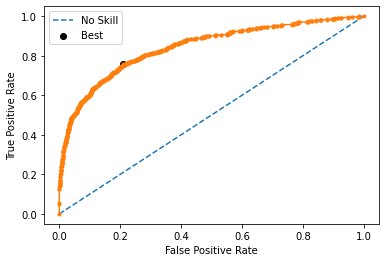

In [ ]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_e10=estimator_v7.predict(X_test)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

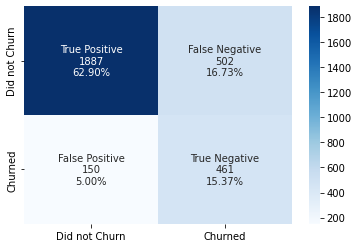

In [ ]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_e10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Did not Churn','Churned']
make_confusion_matrix(cm10,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [ ]:
#Accuracy as per the classification report
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      2389
           1       0.48      0.75      0.59       611

    accuracy                           0.78      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.78      0.80      3000



### Compare all Models

Since the recall score is our primary metrics, for the ease of comparison let us see the no. of False Negatives in each model

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Basic model - 2 layers without ROC threshold','Basic model - 4 layers with ROC threshold','3 layers with BatchNormalization','4 layers with Dropout(rate=0.5)',
                                          'Hyperparameters tuned with Randomsearch - 4 layers with Dropout(0.5)','Hyperparameters tuned with Grid Search CV - 4 layers with Dropout(0.8)',
                                          'Tuned for no.of layers,neurons and lr rate using Keras Tuner – 5 layers','Tuned for no.of layers,neurons and lr rate using Keras Tuner – 5 layers with dropout(0.5)',
                                          'SMOTE+Keras Tuner – 8 layers','SMOTE + GridSearch CV – 4 layers'],'No. of False Negatives': [cm[0,1],cm1[0,1],cm2[0,1],cm3[0,1],cm4[0,1],cm5[0,1],cm6[0,1],cm7[0,1],cm9[0,1],cm10[0,1]]})

In [ ]:
comparison_frame

,Model,No. of False Negatives
0,Basic model - 2 layers without ROC threshold,96
1,Basic model - 4 layers with ROC threshold,493
2,3 layers with BatchNormalization,787
3,4 layers with Dropout(rate=0.5),378
4,Hyperparameters tuned with Randomsearch - 4 la...,442
5,Hyperparameters tuned with Grid Search CV - 4 ...,731
6,"Tuned for no.of layers,neurons and lr rate usi...",570
7,"Tuned for no.of layers,neurons and lr rate usi...",461
8,SMOTE+Keras Tuner – 8 layers,563
9,SMOTE + GridSearch CV – 4 layers,502


If we ingore the very first model, we can see that the **model with Dropout on the imbalanced data had the least False Negatives, higher recall score and higher f1-score.** Hence that model - **4 layers with Dropout (rate = 0.5)** is the best model.

### Other Conclusions

* Hyperparameter tuning decreased the loss function in training data but the validation data's loss function had so much noise, indicating the overfitting phenomenon with this dataset.
* The usage of SMOTE analysis did not yield any useful results, it also have overfit the data with this dataset
* BatchNormalization also had overfitting issue.
* Having tried 2 different Dropout rates - 0.5 and 0.8, 0.8 did not work with this dataset as this also led to overfitting.   

## Business Recommendations:


* Since all the customers with Credit score lower than the lower whisker have churned, the bank might take some steps towards customers with lower credit score to help decrease churn rate.
* As most customers who have churned are from Germany, the bank might introduce some programs in Germany to help decrease teh churn rate
* Customers who are aged between 40 - 50 have churned the most, bank might consider providing more offers to these customers.
* The Balance variable, Estimated Salary and the Credit score variable did not tell us any significant information about churning and hence can be removed from future analysis.
* Customers with either 1 product and the customers with 3 products have churned. Also, all the customers with 4 products have churned. Hence, the bank should not try to push more number of productts to the customers, also at the same time try to make sure that the customers dont have 1 product only to avoid churning.
* Most customers who are inactive have churned the most - so the bank should focus more on them